# <center>**=====YouTube AdView Prediction=======**</center>



#  **Data Description** 

The file train.csv contains metrics and other details of about 15000 youtube videos. The metrics include number of views, likes, dislikes, comments and apart from that published date, duration and category are also included.  The train.csv file also contains the metric number of adviews which is our target variable for prediction.  

#  **Objective**  
To build a machine learning regression to predict youtube adview count based 
on other youtube metrics.  

### **Data Description:**
- train.csv - the training set
- test.csv - the test set
- The file train.csv contains metrics and other details of about 15000 youtube videos. The metrics include number of views, likes, dislikes, comments and apart from that published date, duration and category are also included. The train.csv file also contains the metric number of adviews which is our target variable for prediction.

## **. Table of Content:**
1. Install & Import Libraries
2. Load Datasets
3. Exploratory Data Analysis
4. Feature Engineering
5. Model Development
6. Find Prediction

# **. Install & Import Libraries**



In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
## Display all the columns of the dataframe
pd.pandas.set_option('display.max_columns',None)

from scipy import stats
from scipy.stats import norm, skew # for some statistics
import warnings # to ignore warning
from sklearn.preprocessing import RobustScaler, PowerTransformer, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

import optuna
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import StackingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
import xgboost as xgb
import lightgbm as lgb
import joblib

import warnings
warnings.filterwarnings('ignore')
print("Library Imported!!")

Library Imported!!


# **. Load Datasets**

In [36]:
# load train and test dataset
train_df = pd.read_csv("Youtube-Adview-Prediction-master/train.csv")
test_df = pd.read_csv("Youtube-Adview-Prediction-master/test.csv")

# **. Exploratory Data Analysis**

In [37]:
train_df.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


In [38]:
train_df.shape

(14999, 9)

In [39]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   vidid      14999 non-null  object
 1   adview     14999 non-null  int64 
 2   views      14999 non-null  object
 3   likes      14999 non-null  object
 4   dislikes   14999 non-null  object
 5   comment    14999 non-null  object
 6   published  14999 non-null  object
 7   duration   14999 non-null  object
 8   category   14999 non-null  object
dtypes: int64(1), object(8)
memory usage: 1.0+ MB


In [40]:
train_df.describe(include='all')

,vidid,adview,views,likes,dislikes,comment,published,duration,category
count,14999,1.499900e+04,14999,14999,14999,14999,14999,14999,14999
unique,14999,NaN,14588,4789,1546,2007,2386,3146,8
top,VID_18655,NaN,885,1,0,0,2016-08-26,PT31S,D
freq,1,NaN,4,174,1091,1290,42,147,7558
mean,NaN,2.107791e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,5.237711e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,2.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,6.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
train_dtype = train_df.dtypes
train_dtype.value_counts()

object    8
int64     1
Name: count, dtype: int64

In [42]:
train_df.isnull().sum()

vidid        0
adview       0
views        0
likes        0
dislikes     0
comment      0
published    0
duration     0
category     0
dtype: int64

## **Missing Values using Misingno**

<Axes: >

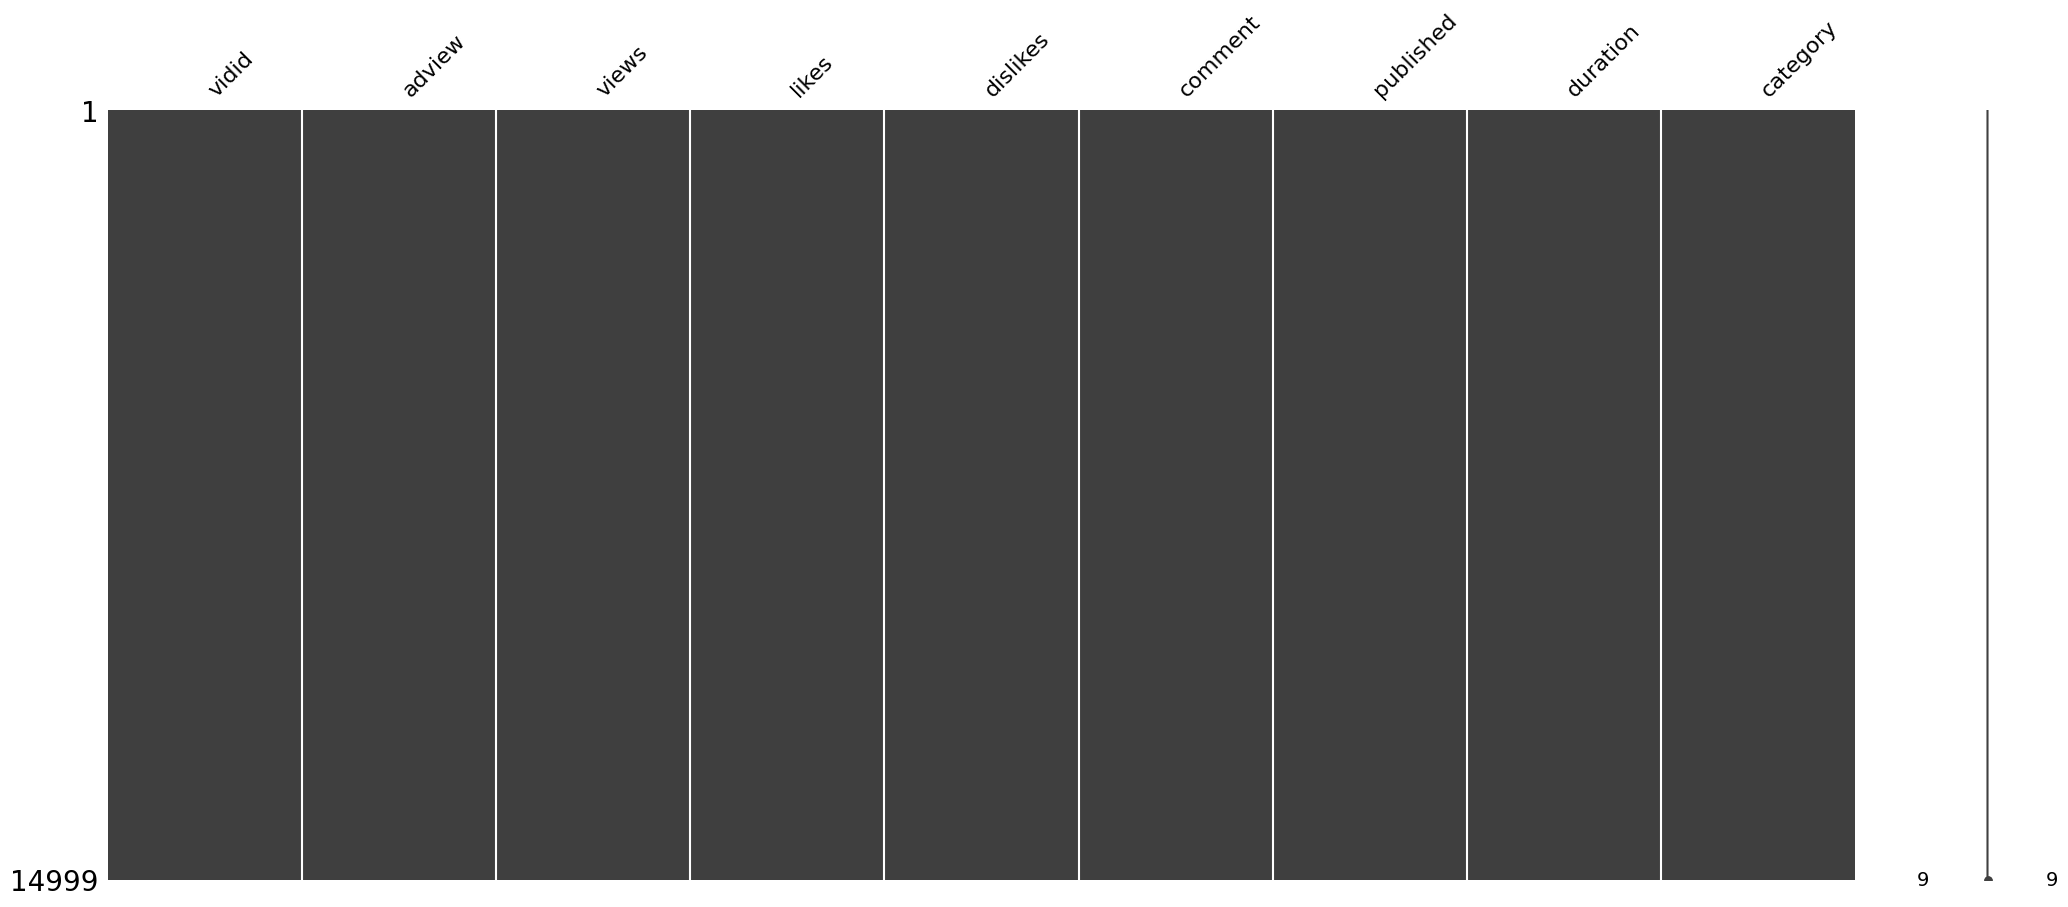

In [43]:
msno.matrix(train_df)

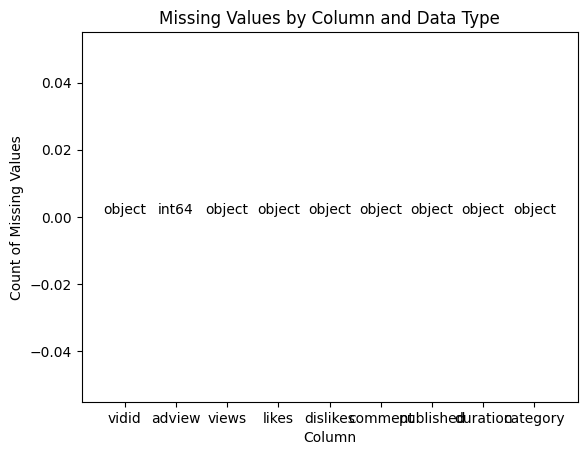

In [44]:
import matplotlib.pyplot as plt
import numpy as np

missing_counts = train_df.isnull().sum()
dtypes = train_df.dtypes

# Create a list of colors for each column
colors = plt.cm.rainbow(np.linspace(0, 1, len(missing_counts)))

plt.bar(missing_counts.index, missing_counts.values, color=colors)
for i, (col, dtype) in enumerate(zip(missing_counts.index, dtypes)):
    plt.text(i, missing_counts.values[i], f'{dtype}', ha='center', va='bottom')
plt.xlabel('Column')
plt.ylabel('Count of Missing Values')
plt.title('Missing Values by Column and Data Type')
plt.show()

In [45]:
train_df.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


In [46]:
test_df.shape

(8764, 8)

In [47]:
test_dtype = test_df.dtypes
test_dtype.value_counts()
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8764 entries, 0 to 8763
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   vidid      8764 non-null   object
 1   views      8764 non-null   object
 2   likes      8764 non-null   object
 3   dislikes   8764 non-null   object
 4   comment    8764 non-null   object
 5   published  8764 non-null   object
 6   duration   8764 non-null   object
 7   category   8764 non-null   object
dtypes: object(8)
memory usage: 547.9+ KB
None


## **Statistical analysis**

In [48]:
test_df.describe(include='all')

,vidid,views,likes,dislikes,comment,published,duration,category
count,8764,8764,8764,8764,8764,8764,8764,8764
unique,8764,8605,3434,1215,1556,2109,2330,8
top,VID_1054,688,2,0,0,8/26/2016,PT31S,D
freq,1,3,89,662,727,32,120,4419


In [49]:
test_df.isnull().sum()

vidid        0
views        0
likes        0
dislikes     0
comment      0
published    0
duration     0
category     0
dtype: int64

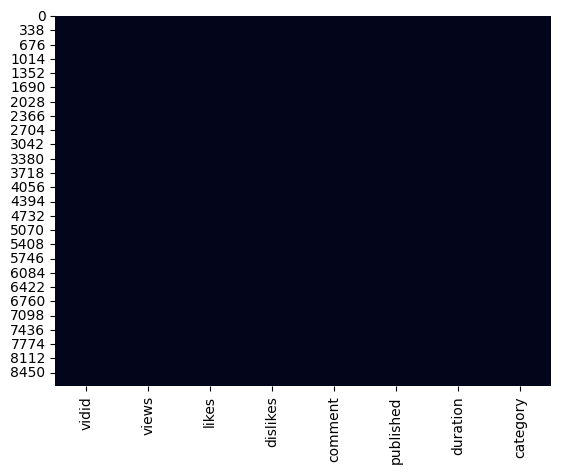

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(test_df.isnull(), cbar=False)
plt.show()

### **Data Type Comparison**

In [52]:
# as 'SalePrice' Column is not available in test dataset. So we'll delete it.
trn_dtype = train_dtype.drop('adview')
trn_dtype.compare(test_dtype)

,self,other


In [53]:
import pandas as pd

# Create a sample DataFrame (replace with your actual data)
null_train = pd.DataFrame({'adview': [1, 2, None, 4, 5], 
                           'column2': [11, 12, 13, 14, 15]})

# Now you can drop the 'adview' column
null_train = null_train.drop('adview', errors='ignore')

In [54]:
null_train = null_train.loc[null_train.index != 'adview']

In [55]:
convert_col = ['views', 'likes', 'dislikes', 'comment']
# these columns contain 'F' letter. So replace it by '0'. As we are converting columns to numerical.
for col in convert_col:
  train_df[col].replace({"F": 0}, inplace=True)
  test_df[col].replace({"F": 0}, inplace=True)


# Convert "categorical" feature to "numerical"
for col in convert_col:
  train_df[col] = train_df[col].astype('int')
  test_df[col] = test_df[col].astype('int')

## Temporal variable analysis

In [56]:
train_df.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


In [57]:
# convert "duration" column format into "second" format
def checki(x):
    y = x[2:]
    h = ''
    m = ''
    s = ''
    mm = ''
    P = ['H','M','S']
    for i in y:
        if i not in P:
            mm+=i
        else:
            if(i=="H"):
                h = mm
                mm = ''
            elif(i == "M"):
                m = mm
                mm = ''
            else:
                s = mm
                mm = ''
    if(h==''):
        h = '00'
    if(m == ''):
        m = '00'
    if(s==''):
        s='00'
    bp = h+':'+m+':'+s
    return bp

train_mp = train_df["duration"]
test_mp = test_df["duration"]

train_time = train_mp.apply(checki)
test_time = test_mp.apply(checki)

def func_sec(time_string):
    h, m, s = time_string.split(":")
    return int(h) * 3600 + int(m) * 60 + int(s)

train_time=train_time.apply(func_sec)
test_time=test_time.apply(func_sec)

train_df["duration"]=train_time
test_df["duration"]=test_time
# train_df.head()

## Convert 'date' to 'year' format in 'published' column

In [58]:
train_df['published'] = pd.DatetimeIndex(train_df['published']).year
test_df['published'] = pd.DatetimeIndex(test_df['published']).year

# convert to numerical feature
train_df['published'] = train_df['published'].astype('int')
test_df['published'] = test_df['published'].astype('int')

In [59]:
print(train_df['published'].head())
print(test_df['published'].head())

0    2016
1    2016
2    2016
3    2016
4    2016
Name: published, dtype: int32
0    2017
1    2016
2    2014
3    2010
4    2016
Name: published, dtype: int32


In [60]:
print(train_df['published'])
print(test_df['published'])

0        2016
1        2016
2        2016
3        2016
4        2016
         ... 
14994    2015
14995    2015
14996    2013
14997    2010
14998    2016
Name: published, Length: 14999, dtype: int32
0       2017
1       2016
2       2014
3       2010
4       2016
        ... 
8759    2011
8760    2016
8761    2016
8762    2016
8763    2016
Name: published, Length: 8764, dtype: int32


In [61]:
print(train_df['published'].describe())
print(test_df['published'].describe())

count    14999.000000
mean      2014.456964
std          1.764241
min       2005.000000
25%       2013.000000
50%       2015.000000
75%       2016.000000
max       2017.000000
Name: published, dtype: float64
count    8764.000000
mean     2014.453560
std         1.768145
min      2005.000000
25%      2013.000000
50%      2015.000000
75%      2016.000000
max      2017.000000
Name: published, dtype: float64


In [62]:
train_df['published'].value_counts()


published
2016    4973
2015    3078
2014    2363
2013    1995
2012     998
2017     563
2011     555
2010     304
2009      94
2008      39
2006      20
2007      15
2005       2
Name: count, dtype: int64

In [63]:
test_df['published'].value_counts()

published
2016    2957
2015    1819
2014    1321
2013    1170
2012     598
2011     324
2017     295
2010     180
2009      51
2008      28
2006      13
2007       7
2005       1
Name: count, dtype: int64

In [64]:
train_df.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016,457,F
1,VID_14135,2,1707,56,2,6,2016,570,D
2,VID_2187,1,2023,25,0,2,2016,136,C
3,VID_23096,6,620860,777,161,153,2016,262,H
4,VID_10175,1,666,1,0,0,2016,31,D


In [65]:
# Separate features into different categories
numerical_features = [col for col in train_df.columns if train_df[col].dtypes != 'O']
discrete_features = [col for col in numerical_features if len(train_df[col].unique()) < 10 and col not in ['vidid']]
continuous_features = [feature for feature in numerical_features if feature not in discrete_features + ['vidid']]
categorical_features = [col for col in train_df.columns if train_df[col].dtype == 'O']

# Print feature categories and their counts
print("Feature Categories:")
print("---------------------")
print(f"Numerical Features: {len(numerical_features)}")
print(f"  - Discrete Features: {len(discrete_features)}")
print(f"  - Continuous Features: {len(continuous_features)}")
print(f"Categorical Features: {len(categorical_features)}")

Feature Categories:
---------------------
Numerical Features: 7
  - Discrete Features: 0
  - Continuous Features: 7
Categorical Features: 2


## Concat Train and Test datasets

In [66]:
# combined train and test datasets
combined_df = pd.concat([train_df,test_df],axis=0)

combined_df["Label"] = "test"
combined_df["Label"][:14999] = "train"

In [67]:
train_df.isnull().sum()

vidid        0
adview       0
views        0
likes        0
dislikes     0
comment      0
published    0
duration     0
category     0
dtype: int64

## Distribution Comparison - Continuous

In [68]:
import numpy as np
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.layouts import gridplot

continuous_features = ['views', 'comment', 'likes', 'dislikes', 'published', 'duration']

plots = []

for feature in continuous_features:
    p = figure(title=feature.capitalize(), x_axis_label=feature, y_axis_label='Count', width=400, height=400)
    
    source1 = ColumnDataSource(data=dict(x=test_df[feature]))
    source2 = ColumnDataSource(data=dict(x=train_df[feature]))
    
    p.quad(top=np.histogram(test_df[feature], bins=50)[0], bottom=0, left=np.histogram(test_df[feature], bins=50)[1][:-1], right=np.histogram(test_df[feature], bins=50)[1][1:], fill_color='orange', alpha=0.5)
    p.quad(top=np.histogram(train_df[feature], bins=50)[0], bottom=0, left=np.histogram(train_df[feature], bins=50)[1][:-1], right=np.histogram(train_df[feature], bins=50)[1][1:], fill_color='green', alpha=0.5)
    
    hover = HoverTool(tooltips=[("x", "@x"), ("y", "@y")])
    p.add_tools(hover)
    
    plots.append(p)

show(gridplot(plots, ncols=3))

## Linearity Check

In [44]:
from bokeh.plotting import figure, show, gridplot
from bokeh.models import ColumnDataSource, HoverTool

continuous_features = ['views', 'comment', 'likes', 'dislikes', 'published', 'duration']

plots = []

for feature in continuous_features:
    p = figure(title=f"Linearity Check: {feature.capitalize()} vs Adview", x_axis_label=feature, y_axis_label='Adview', width=400, height=400)
    
    source = ColumnDataSource(data=dict(x=combined_df[feature], y=combined_df['adview']))
    
    p.circle(x='x', y='y', source=source, size=5, alpha=0.5)
    
    hover = HoverTool(tooltips=[("x", "@x"), ("y", "@y")])
    p.add_tools(hover)
    
    plots.append(p)

show(gridplot(plots, ncols=3))

## Distribution Comparison - Categorical 

<Axes: xlabel='category'>

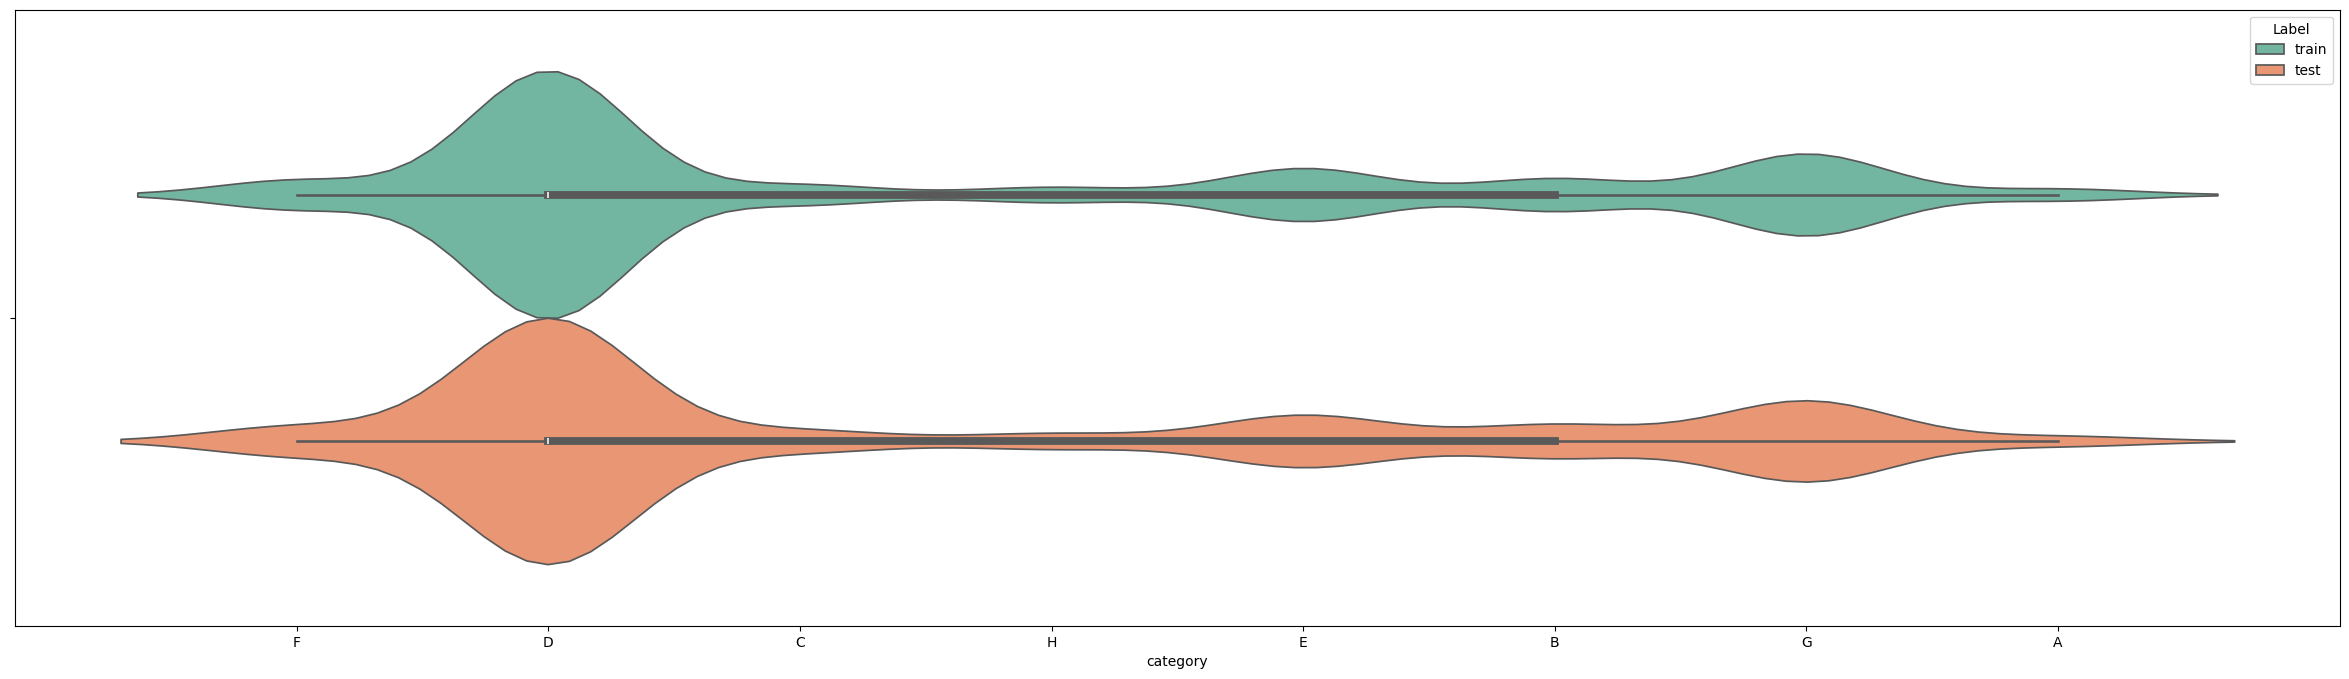

In [45]:
plt.figure(figsize=(30, 8))
sns.violinplot(data = combined_df, x = 'category', hue="Label", palette="Set2")

## Distribution - Target Variable

<Axes: xlabel='None', ylabel='adview'>

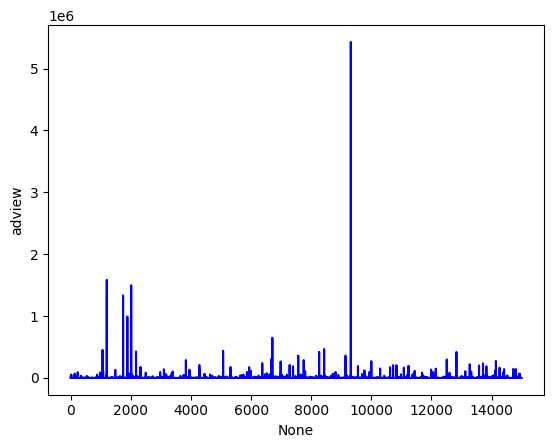

In [47]:
sns.lineplot(x=train_df.index, y=train_df["adview"], color='b')

## **Data Correlation**

In [46]:
numeric_cols = train_df.select_dtypes(include=[np.number])
training_corr = numeric_cols.corr(method='spearman')

In [47]:
train_df = train_df.drop(columns=[col for col in train_df.columns if train_df[col].dtype == 'object'])
training_corr = train_df.corr(method='spearman')

<Axes: >

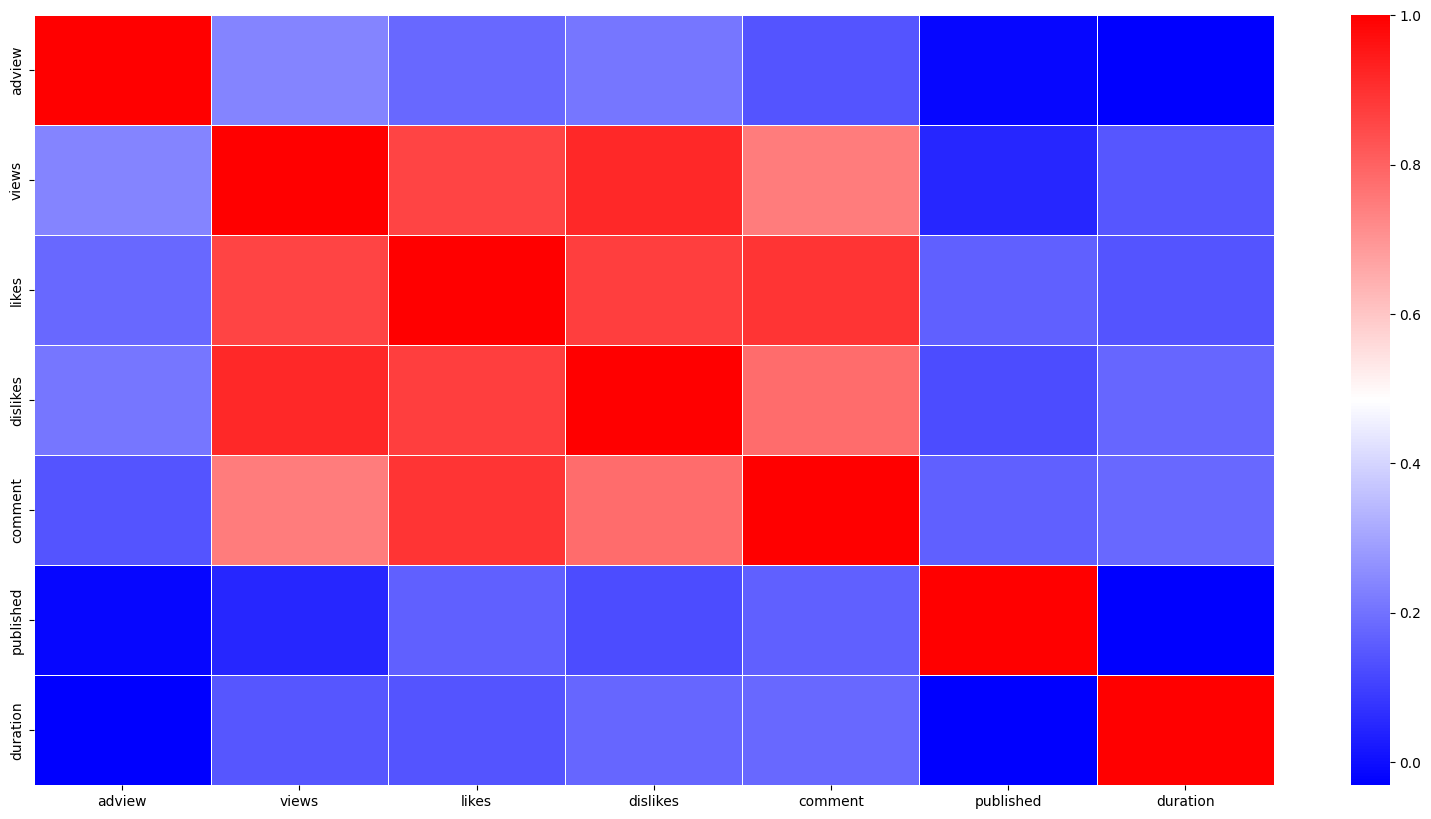

In [48]:
import matplotlib.colors as mcolors

cmap = mcolors.LinearSegmentedColormap.from_list("", ["blue", "white", "red"])
training_corr = train_df.corr(method='spearman') 
plt.figure(figsize=(20,10))
sns.heatmap(training_corr, cmap=cmap, linewidths=.5)

## **Feature Engineering**

Drop Columns

In [49]:
# Define columns to drop
drop_columns = ["vidid", "Label", "published", "duration"]

# Print number of columns before and after dropping
print(f"Number of columns before dropping: {len(combined_df.columns)}")
print(f"Number of columns to drop: {len(drop_columns)}")

# Drop columns
combined_df.drop(columns=drop_columns, inplace=True, errors='ignore')

print(f"Number of columns after dropping: {len(combined_df.columns)}")

Number of columns before dropping: 10
Number of columns to drop: 4
Number of columns after dropping: 6


## Apply PowerTransformer to columns

In [50]:
# Define columns to check for skewness
skew_check_col = ["views", "likes", "dislikes", "comment"]

# Calculate skewness of numerical features
skewed_feats = combined_df[skew_check_col].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)

# Print skewness of numerical features
print("\nSkew in numerical features:\n")
skewness_df = pd.DataFrame({"Skew": skewed_feats})
print(skewness_df.head(7))

# Apply PowerTransformer to skewed columns
for col in skew_check_col:
    power = PowerTransformer(method="yeo-johnson", standardize=True)
    combined_df[[col]] = power.fit_transform(combined_df[[col]])

print(f"Number of skewed numerical features transformed: {len(skew_check_col)}")


Skew in numerical features:

               Skew
views     29.926939
comment   18.761969
dislikes  18.269315
likes     11.914098
Number of skewed numerical features transformed: 4


## **Encoding Categorical Features**

# One-Hot Encoding

In [51]:
# Generate one-hot dummy columns using get_dummies
combined_df = pd.get_dummies(combined_df).reset_index(drop=True)

# Preview the resulting dataframe
print(combined_df.head())

   adview     views     likes  dislikes   comment  category_A  category_B  \
0    40.0  1.000244  1.441680  1.103359  1.398827       False       False   
1     2.0 -1.693941 -0.819659 -1.200594 -0.781064       False       False   
2     1.0 -1.641413 -1.119185 -1.747128 -1.168045       False       False   
3     6.0  0.722749  0.280058  0.723964  0.577704       False       False   
4     1.0 -1.970231 -2.009511 -1.747128 -1.679421       False       False   

   category_C  category_D  category_E  category_F  category_G  category_H  
0       False       False       False        True       False       False  
1       False        True       False       False       False       False  
2        True       False       False       False       False       False  
3       False       False       False       False       False        True  
4       False        True       False       False       False       False  


In [52]:
# Split the combined dataframe into training and testing sets
new_train_data, new_test_data = combined_df.iloc[:len(train_df), :], combined_df.iloc[len(train_df):, :]

# Define feature and target variables for training and testing sets
X_train, y_train = new_train_data.drop('adview', axis=1), np.log1p(new_train_data['adview'].values.ravel())
X_test = new_test_data.drop('adview', axis=1)

In [53]:
# Create a preprocessing pipeline with RobustScaler
pre_processing_pipeline = make_pipeline(RobustScaler())

# Fit and transform the training data, and transform the testing data
X_train = pre_processing_pipeline.fit_transform(X_train)
X_test = pre_processing_pipeline.transform(X_test)

# Print the shapes of the transformed data
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (14999, 12)
X_test shape: (8764, 12)


# **. Model Development**

Hyperparameter Tuning using Optuna

In [54]:
# Set random seed for reproducibility
RANDOM_SEED = 23

# Create 10-fold cross-validation object with shuffling
kfolds = KFold(n_splits=10, shuffle=True, random_state=RANDOM_SEED)

# Define Hyperparameter Tuning Function

In [55]:
def tune_hyperparameters(objective):
    """
    Perform hyperparameter tuning using Optuna.

    Args:
        objective (function): Objective function to optimize.

    Returns:
        dict: Optimized hyperparameters.
    """
    # Create Optuna study with maximization direction
    study = optuna.create_study(direction="maximize")

    # Perform hyperparameter tuning with 100 trials
    study.optimize(objective, n_trials=100)

    # Extract best score and optimized parameters
    best_score = study.best_value
    params = study.best_params

    # Print results
    print(f"Best score: {best_score}")
    print(f"Optimized parameters: {params}")

    return params



# Ridge Regression Hyperparameter Tuning

# Define Hyperparameter Tuning Function

In [56]:
def ridge_hyperparameter_tuning(trial):
    """
    Define the objective function for hyperparameter tuning of Ridge regression.

    Args:
        trial (optuna.trial.Trial): Optuna trial object.

    Returns:
        float: Mean cross-validated score.
    """
    # Suggest hyperparameter value for alpha
    alpha = trial.suggest_float("alpha", 0.1, 20)

    # Create Ridge regression model with suggested alpha
    ridge = Ridge(alpha=alpha, random_state=RANDOM_SEED)

    # Perform cross-validation with 10-fold CV
    scores = cross_val_score(
        ridge, X_train, y_train, cv=kfolds, scoring="neg_root_mean_squared_error"
    )

    # Return mean cross-validated score
    return scores.mean()

# Perform Hyperparameter Tuning

In [57]:
# Perform hyperparameter tuning with 100 trials
best_params = tune_hyperparameters(ridge_hyperparameter_tuning)

print(f"Best score: {-1.898690687982798}")
print(f"Optimized parameters: {best_params}")

[I 2024-08-30 20:34:08,335] A new study created in memory with name: no-name-304c660e-967b-4d9f-a808-e9c61bec7263
[I 2024-08-30 20:34:08,543] Trial 0 finished with value: -1.8986956575759073 and parameters: {'alpha': 13.354915449518844}. Best is trial 0 with value: -1.8986956575759073.
[I 2024-08-30 20:34:08,648] Trial 1 finished with value: -1.8986990338762666 and parameters: {'alpha': 10.37848664037008}. Best is trial 0 with value: -1.8986956575759073.
[I 2024-08-30 20:34:08,744] Trial 2 finished with value: -1.8987113199985726 and parameters: {'alpha': 2.658647853697825}. Best is trial 0 with value: -1.8986956575759073.
[I 2024-08-30 20:34:08,821] Trial 3 finished with value: -1.8986929390114688 and parameters: {'alpha': 16.413236122753325}. Best is trial 3 with value: -1.8986929390114688.
[I 2024-08-30 20:34:08,904] Trial 4 finished with value: -1.8986968860782554 and parameters: {'alpha': 12.195225591529518}. Best is trial 3 with value: -1.8986929390114688.
[I 2024-08-30 20:34:09,

Best score: -1.8986906873361709
Optimized parameters: {'alpha': 19.999877407135134}
Best score: -1.898690687982798
Optimized parameters: {'alpha': 19.999877407135134}




# Lasso Regression Hyperparameter Tuning

# Define Hyperparameter Tuning Function

<Axes: >

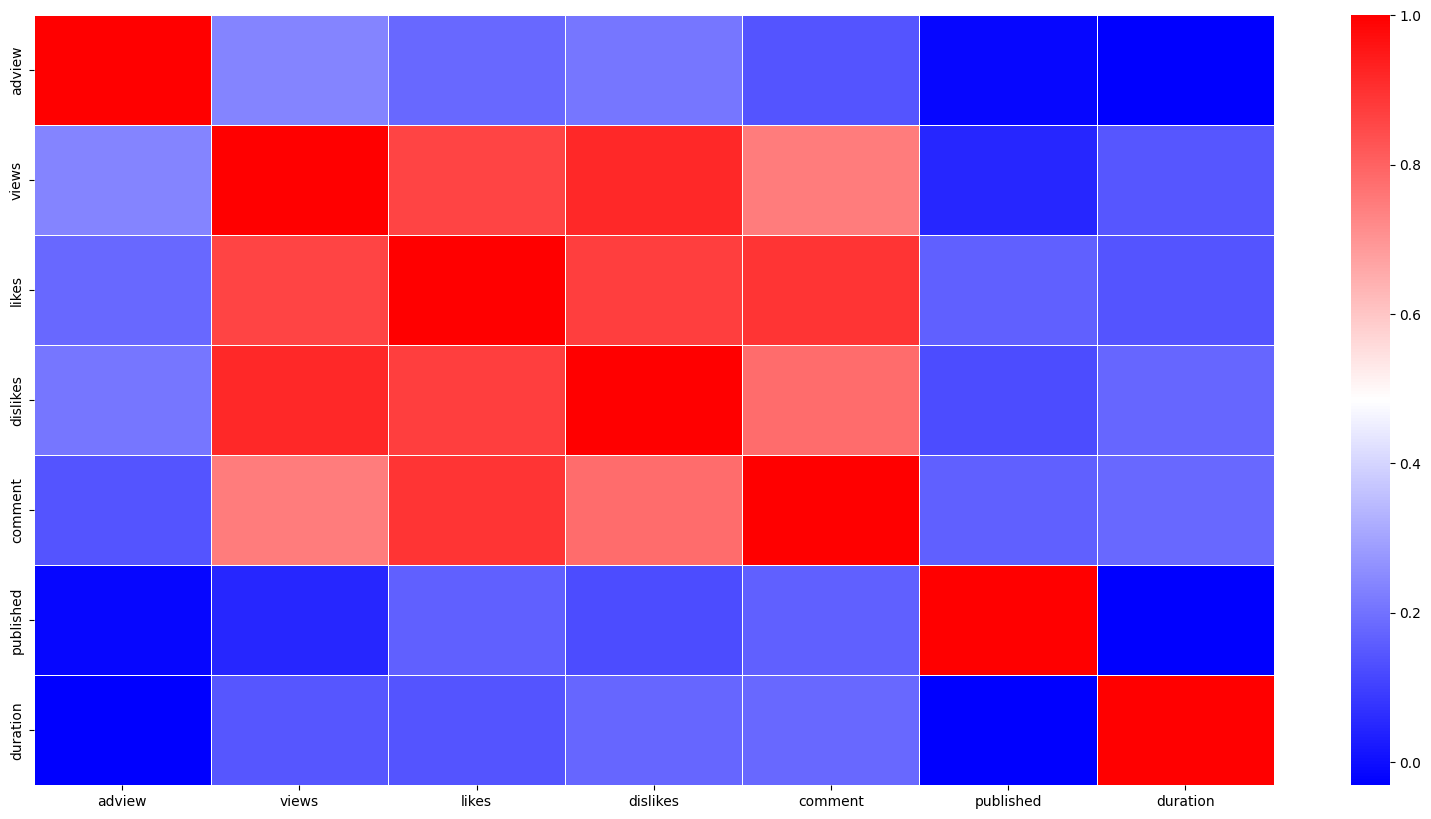

In [58]:
import matplotlib.colors as mcolors

cmap = mcolors.LinearSegmentedColormap.from_list("", ["blue", "white", "red"])
training_corr = train_df.corr(method='spearman') 
plt.figure(figsize=(20,10))
sns.heatmap(training_corr, cmap=cmap, linewidths=.5)

# Perform Hyperparameter Tuning

In [59]:
# Define Hyperparameter Tuning Function

def lasso_hyperparameter_tuning(trial):
    """
    Define the objective function for hyperparameter tuning of Lasso regression.

    Args:
        trial (optuna.trial.Trial): Optuna trial object.

    Returns:
        float: Mean cross-validated score.
    """
    # Suggest hyperparameter value for alpha
    alpha = trial.suggest_float("alpha", 0.0001, 1)

    # Create Lasso regression model with suggested alpha
    lasso = Lasso(alpha=alpha, random_state=RANDOM_SEED)

    # Perform cross-validation with 10-fold CV
    scores = cross_val_score(
        lasso, X_train, y_train, cv=kfolds, scoring="neg_root_mean_squared_error"
    )

    # Return mean cross-validated score
    return scores.mean()

# Perform hyperparameter tuning with 100 trials
best_params = tune_hyperparameters(lasso_hyperparameter_tuning)

print(f"Best score: {-1.8987548559962844}")
print(f"Optimized parameters: {best_params}")

# Create Lasso regression model with optimized parameters
lasso = Lasso(**best_params, random_state=RANDOM_SEED)

# Train the model on the training data
lasso.fit(X_train, y_train)

[I 2024-08-30 20:34:24,239] A new study created in memory with name: no-name-dc1fedb9-8bc2-4402-8015-87054c1b6cbc
[I 2024-08-30 20:34:25,279] Trial 0 finished with value: -1.9155378884833845 and parameters: {'alpha': 0.8426689187651019}. Best is trial 0 with value: -1.9155378884833845.
[I 2024-08-30 20:34:27,044] Trial 1 finished with value: -1.9155378884833845 and parameters: {'alpha': 0.8572866825859246}. Best is trial 0 with value: -1.9155378884833845.
[I 2024-08-30 20:34:27,991] Trial 2 finished with value: -1.9155378884833845 and parameters: {'alpha': 0.9011370699824315}. Best is trial 0 with value: -1.9155378884833845.
[I 2024-08-30 20:34:29,591] Trial 3 finished with value: -1.9155378884833845 and parameters: {'alpha': 0.4087929221180469}. Best is trial 0 with value: -1.9155378884833845.
[I 2024-08-30 20:34:30,750] Trial 4 finished with value: -1.9155378884833845 and parameters: {'alpha': 0.3415316539950284}. Best is trial 0 with value: -1.9155378884833845.
[I 2024-08-30 20:34:3

Best score: -1.8987158127339245
Optimized parameters: {'alpha': 0.00014393587928868547}
Best score: -1.8987548559962844
Optimized parameters: {'alpha': 0.00014393587928868547}


Lasso(alpha=0.00014393587928868547, random_state=23)

In [60]:
import optuna

# Define Hyperparameter Tuning Function

def lasso_hyperparameter_tuning(trial):
    """
    Define the objective function for hyperparameter tuning of Lasso regression.

    Args:
        trial (optuna.trial.Trial): Optuna trial object.

    Returns:
        float: Mean cross-validated score.
    """
    # Suggest hyperparameter value for alpha
    alpha = trial.suggest_float("alpha", 0.0001, 1)

    # Create Lasso regression model with suggested alpha
    lasso = Lasso(alpha=alpha, random_state=RANDOM_SEED)

    # Perform cross-validation with 10-fold CV
    scores = cross_val_score(
        lasso, X_train, y_train, cv=kfolds, scoring="neg_root_mean_squared_error"
    )

    # Return mean cross-validated score
    return scores.mean()

# Perform hyperparameter tuning with 100 trials
study = optuna.create_study(direction="maximize")
study.optimize(lasso_hyperparameter_tuning, n_trials=100)

best_params = study.best_trial.params
best_score = study.best_trial.value

print(f"Best score: {best_score}")
print(f"Optimized parameters: {best_params}")

# Create Lasso regression model with optimized parameters
lasso = Lasso(**best_params, random_state=RANDOM_SEED)

# Train the model on the training data
lasso.fit(X_train, y_train)

[I 2024-08-30 20:36:21,850] A new study created in memory with name: no-name-75c02902-12db-4b4a-bbc5-c978b5590ac5
[I 2024-08-30 20:36:22,431] Trial 0 finished with value: -1.9155378884833845 and parameters: {'alpha': 0.7934602802361206}. Best is trial 0 with value: -1.9155378884833845.
[I 2024-08-30 20:36:22,848] Trial 1 finished with value: -1.9155378884833845 and parameters: {'alpha': 0.8666003140750623}. Best is trial 0 with value: -1.9155378884833845.
[I 2024-08-30 20:36:23,865] Trial 2 finished with value: -1.9155378884833845 and parameters: {'alpha': 0.32405129991439113}. Best is trial 0 with value: -1.9155378884833845.
[I 2024-08-30 20:36:25,384] Trial 3 finished with value: -1.9146294530958894 and parameters: {'alpha': 0.04529404936849356}. Best is trial 3 with value: -1.9146294530958894.
[I 2024-08-30 20:36:25,870] Trial 4 finished with value: -1.9155378884833845 and parameters: {'alpha': 0.42759329966051784}. Best is trial 3 with value: -1.9146294530958894.
[I 2024-08-30 20:3

Best score: -1.898715798960253
Optimized parameters: {'alpha': 0.00013243292342439672}


Lasso(alpha=0.00013243292342439672, random_state=23)

# Gradient Boosting Regressor

In [61]:
def gbr_objective(trial):
    _n_estimators = trial.suggest_int("n_estimators", 50, 2000)
    _learning_rate = trial.suggest_float("learning_rate", 0.01, 1)
    _max_depth = trial.suggest_int("max_depth", 1, 20)
    _min_samp_split = trial.suggest_int("min_samples_split", 2, 20)
    _min_samples_leaf = trial.suggest_int("min_samples_leaf", 2, 20)
    _max_features = trial.suggest_int("max_features", 10, 50)

    gbr = GradientBoostingRegressor(
        n_estimators=_n_estimators,
        learning_rate=_learning_rate,
        max_depth=_max_depth, 
        max_features=_max_features,
        min_samples_leaf=_min_samples_leaf,
        min_samples_split=_min_samp_split,
        
        random_state=RANDOM_SEED,
    )

    score = cross_val_score(
        gbr, X_train,y_train, cv=kfolds, scoring="neg_root_mean_squared_error"
    ).mean()
    return score

# gbr_params = tune(gbr_objective)

# Best score: -1.8222372332051289 
gbr_params = {'n_estimators': 1396, 'learning_rate': 0.014373145732630006, 'max_depth': 6, 'min_samples_split': 6, 'min_samples_leaf': 7, 'max_features': 10}

In [62]:
gbr = GradientBoostingRegressor(random_state=RANDOM_SEED, **gbr_params)
gbr.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=0.014373145732630006, max_depth=6,
                          max_features=10, min_samples_leaf=7,
                          min_samples_split=6, n_estimators=1396,
                          random_state=23)

# Train Gradient Boosting Regressor Model with Optimized Parameters

In [63]:
# Create Gradient Boosting Regressor model with optimized parameters
gbr = GradientBoostingRegressor(random_state=RANDOM_SEED, **best_params)

# Train the model on the training data
gbr.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.00013243292342439672, random_state=23)

# Hyperparameter Tuning and Model Training

# Define XGBoost Hyperparameter Tuning Function

In [64]:
def xgb_hyperparameter_tuning(trial):
    """
    Define the objective function for hyperparameter tuning of XGBoost Regressor.

    Args:
        trial (optuna.trial.Trial): Optuna trial object.

    Returns:
        float: Mean cross-validated score.
    """
    # Suggest hyperparameter values
    n_estimators = trial.suggest_int("n_estimators", 50, 2000)
    max_depth = trial.suggest_int("max_depth", 1, 20)
    learning_rate = trial.suggest_float("learning_rate", 0.01, 1)
    gamma = trial.suggest_float("gamma", 0.01, 1)
    min_child_weight = trial.suggest_float("min_child_weight", 0.1, 10)
    subsample = trial.suggest_float('subsample', 0.01, 1)
    reg_alpha = trial.suggest_float('reg_alpha', 0.01, 10)
    reg_lambda = trial.suggest_float('reg_lambda', 0.01, 10)

    # Create XGBoost Regressor model with suggested hyperparameters
    xgbr = xgb.XGBRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        learning_rate=learning_rate,
        gamma=gamma,
        min_child_weight=min_child_weight,
        subsample=subsample,
        reg_alpha=reg_alpha,
        reg_lambda=reg_lambda,
        random_state=RANDOM_SEED,
    )

    # Perform cross-validation with 10-fold CV
    scores = cross_val_score(
        xgbr, X_train, y_train, cv=kfolds, scoring="neg_root_mean_squared_error"
    )

    # Return mean cross-validated score
    return scores.mean()

# Perform XGBoost Hyperparameter Tuning

In [65]:
# Perform hyperparameter tuning with 100 trials
study = optuna.create_study(direction="maximize")
study.optimize(xgb_hyperparameter_tuning, n_trials=100)

xgb_best_params = study.best_trial.params
xgb_best_score = study.best_trial.value

print(f"XGBoost Best score: {xgb_best_score}")
print(f"XGBoost Optimized parameters: {xgb_best_params}")

[I 2024-08-30 20:38:52,025] A new study created in memory with name: no-name-a05f51dd-6223-472b-aa56-d3b34d9ca9e8
[I 2024-08-30 20:40:05,079] Trial 0 finished with value: -2.069825349203465 and parameters: {'n_estimators': 1382, 'max_depth': 7, 'learning_rate': 0.33689271532756415, 'gamma': 0.493935304242421, 'min_child_weight': 7.682346615574606, 'subsample': 0.5905872160964112, 'reg_alpha': 5.873885536491608, 'reg_lambda': 2.219302519866521}. Best is trial 0 with value: -2.069825349203465.
[I 2024-08-30 20:41:28,548] Trial 1 finished with value: -2.1507395431456198 and parameters: {'n_estimators': 1171, 'max_depth': 11, 'learning_rate': 0.17676081010277578, 'gamma': 0.012517354361073907, 'min_child_weight': 7.194339999466256, 'subsample': 0.1266427981337041, 'reg_alpha': 2.4378803113232035, 'reg_lambda': 6.847346840776028}. Best is trial 0 with value: -2.069825349203465.
[I 2024-08-30 20:41:40,509] Trial 2 finished with value: -2.2052920315029194 and parameters: {'n_estimators': 292,

# Train XGBoost Regressor Model with Optimized Parameters

In [ ]:
# Create XGBoost Regressor model with optimized parameters
xgbr = xgb.XGBRegressor(random_state=RANDOM_SEED, **xgb_best_params)

# Train the model on the training data
xgbr.fit(X_train, y_train)

NameError: name 'xgb_best_params' is not defined

### Define LightGBM Hyperparameter Tuning Function

In [ ]:
import lightgbm as lgb

def lgb_objective(trial):
    _num_leaves = trial.suggest_int("num_leaves", 50, 100)
    _max_depth = trial.suggest_int("max_depth", 1, 20)
    _learning_rate = trial.suggest_float("learning_rate", 0.01, 1)
    _n_estimators = trial.suggest_int("n_estimators", 50, 2000)
    _min_child_weight = trial.suggest_float("min_child_weight", 0.1, 10)
    _reg_alpha = trial.suggest_float('reg_alpha', 0.01, 10)
    _reg_lambda = trial.suggest_float('reg_lambda', 0.01, 10)
    _subsample = trial.suggest_float('subsample', 0.01, 1)


    
    lgbr = lgb.LGBMRegressor(objective='regression',
                             num_leaves=_num_leaves,
                             max_depth=_max_depth,
                             learning_rate=_learning_rate,
                             n_estimators=_n_estimators,
                             min_child_weight=_min_child_weight,
                             subsample=_subsample,
                             reg_alpha=_reg_alpha,
                             reg_lambda=_reg_lambda,
                             random_state=RANDOM_SEED,
    )
    

    score = cross_val_score(
        lgbr, X_train,y_train, cv=kfolds, scoring="neg_root_mean_squared_error"
    ).mean()
    return score


# lgb_params = tune(lgb_objective)

# Best score: -1.824529794158143 
lgb_params =  {'num_leaves': 84, 'max_depth': 10, 'learning_rate': 0.011076909667786489, 'n_estimators': 727, 'min_child_weight': 4.921109754366219, 'reg_alpha': 4.370797996109474, 'reg_lambda': 8.552921079737136, 'subsample': 0.4411906869457217}


In [ ]:
lgbr = lgb.LGBMRegressor(objective='regression', random_state=RANDOM_SEED, **lgb_params)
lgbr.fit(X_train,y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000935 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1036
[LightGBM] [Info] Number of data points in the train set: 14999, number of used features: 12
[LightGBM] [Info] Start training from score 1.780293
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

LGBMRegressor(learning_rate=0.011076909667786489, max_depth=10,
              min_child_weight=4.921109754366219, n_estimators=727,
              num_leaves=84, objective='regression', random_state=23,
              reg_alpha=4.370797996109474, reg_lambda=8.552921079737136,
              subsample=0.4411906869457217)

### StackingRegressor

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
import lightgbm as lgb

# Define and initialize the base estimators
ridge = Ridge()
lasso = Lasso()
gbr = GradientBoostingRegressor()
xgbr = xgb.XGBRegressor()
lgbr = lgb.LGBMRegressor()

# Now you can create the stacking regressor
stack = StackingRegressor(
    estimators=[
        ('ridge', ridge),
        ('lasso', lasso),
        ('gradientboostingregressor', gbr),
        ('xgb', xgbr),
        ('lgb', lgbr),
    ],
    cv=kfolds
)

stack.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000558 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1036
[LightGBM] [Info] Number of data points in the train set: 14999, number of used features: 12
[LightGBM] [Info] Start training from score 1.780293
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001336 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1036
[LightGBM] [Info] Number of data points in the train set: 13499, number of used features: 12
[LightGBM] [Info] Start training from score 1.777665
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000483 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1036
[LightGBM] [Info] Number of data points in the train set

StackingRegressor(cv=KFold(n_splits=10, random_state=23, shuffle=True),
                  estimators=[('ridge', Ridge()), ('lasso', Lasso()),
                              ('gradientboostingregressor',
                               GradientBoostingRegressor()),
                              ('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enabl...
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                              ('lgb', LGBMRegressor())])

## **Saving the model**

In [ ]:
import pickle

# Save the model to a file
with open("prediction_model.pkl", "wb") as f:
    pickle.dump(stack, f)

# Load the model from the file
with open("prediction_model.pkl", "rb") as f:
    model = pickle.load(f)

model

NameError: name 'stack' is not defined

# **. Find Prediction**

In [ ]:
print('Predict submission')
final_test_df = pd.read_csv("Youtube-Adview-Prediction-master/test.csv")

final_test_df['AdView'] = np.round(np.expm1(model.predict(X_test))).astype(int)

final_test_df.to_csv('submission_test.csv', index=False)

Predict submission


NameError: name 'model' is not defined

In [ ]:
final_test_df.head()

,vidid,views,likes,dislikes,comment,published,duration,category,AdView
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,B,6
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,F,5
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,D,5
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,G,6
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,B,8


## **THANK YOU**